In [3]:
import pandas as pd
import math
from scipy import stats
import scipy
import statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, norm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv (r"-")
print (df)

      Unnamed: 0         x
0              1  0.074187
1              2  0.058624
2              3  0.011584
3              4  0.007977
4              5  0.208048
...          ...       ...
4995        4996  0.052144
4996        4997  0.066646
4997        4998  0.029344
4998        4999  0.002050
4999        5000  0.028198

[5000 rows x 2 columns]


In [5]:
x = (df.loc[:,"x"])

In [6]:
xarr = []
for num in x:
    xarr.append(num)
mean = 0
for num in xarr:
    mean += num
print(mean)
mean = mean/5000
print("Mean = " + str(mean))

414.9941609345372
Mean = 0.08299883218690744


In [7]:
stddev = 0
for num in xarr:
    stddev += (num - mean)*(num - mean)
stddev = stddev/4999
stddev = math.sqrt(stddev)
print("Sample Standard Deviation = " + str(stddev))

Sample Standard Deviation = 0.082455843211671


In [8]:
#For Question-1 we take value for checking as 0.075
z_value = 1/(stats.norm.cdf((0.05/2.0)))
test_stat = (mean - 0.075)/stddev*(math.sqrt(5000))
print("Critical Value: ", z_value)
print("Test Statistic assuming Hypothesis to be true: ", test_stat)
if(test_stat>z_value or test_stat<-z_value):
    print("Thus, Null Hypothesis is Rejected")
else:
    print("Thus, Null Hypothesis is not rejected")

Critical Value:  1.9608899780304625
Test Statistic assuming Hypothesis to be true:  6.859463514812385
Thus, Null Hypothesis is Rejected


In [9]:
#For Question-2 we take variance value for checking as 0.0067
test_stat = (4999)*stddev**2/0.0067
low = chi2.ppf(0.05 / 2, 4999)
hi = chi2.ppf(1 - (0.05 / 2), 4999)
print("Lower Critical Value: ", low)
print("Upper Critical Value: ", hi)
print("Test statistic assuming Hypothesis to be true: ", test_stat)
if(test_stat<low or test_stat>hi):
    print("Thus, Null Hypothesis is Rejected")
else:
    print("Thus, Null Hypothesis is not Rejected")

Lower Critical Value:  4804.924332159057
Upper Critical Value:  5196.864170605186
Test statistic assuming Hypothesis to be true:  5072.840512337105
Thus, Null Hypothesis is not Rejected


In [10]:
#For Question-3 we perform the chi-square goodness of fit test
n=len(x)
dists = ['norm', 'expon', 'uniform', 'chi', 'lognorm', 'gamma', 'chi2' ]
pbins = np.linspace(0,100,40)
pcuts = np.percentile(x, pbins)
obsFreq, bins = (np.histogram(x, bins=pcuts))
cumObsFreq = np.cumsum(obsFreq)

params = {}
curmin = 1e10
ans = ""
for curdist in dists:
    dist = getattr(stats, curdist)
    param = dist.fit(x)
    params[curdist] = param
    CDFfit = dist.cdf(pcuts, *param)
    expFreq = []
    for bin in range(len(pbins)-1):
        expFreq.append(CDFfit[bin+1] - CDFfit[bin])
    expFreq = np.array(expFreq) * n
    cumExpFreq = np.cumsum(expFreq)
    D_2 = sum (((cumExpFreq - cumObsFreq) ** 2) / cumObsFreq)
    if(curmin>D_2):
        curmin = D_2
        ans = curdist
        ansparam = param

print("The value of our test statistic D^2: ", curmin)
print("Critical Value at 0.05 significance: ", chi2.ppf(0.05, 38))
if(ans=="expon"):
    print("Thus, Null hypothesis that the data follows exponential distribution is accepted")
else:
    print("Null hypothesis is rejected")

The value of our test statistic D^2:  2.5458921978489455
Critical Value at 0.05 significance:  24.883904383335626
Thus, Null hypothesis that the data follows exponential distribution is accepted


In [11]:
#We also perform the Kolmogorov-Smirnov test to check if it is indeed exponential
class Distribution(object):
    
    def __init__(self,dist_names_list = []):
        self.dist_names = ['norm','lognorm','expon', 'chi2', 'gamma']
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
        
    def Fit(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            self.dist_results.append((dist_name,p))
        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p
        
        self.isFitted = True
        return self.DistributionName,self.PValue

In [12]:
r = df['x']
dst = Distribution()
dst.Fit(r)
if(dst.Fit(r)[0]=="expon"):
    print("Null hypothesis that the data follows exponential distribution is accepted")
else:
    print("Null hypothesis is rejected")

Null hypothesis that the data follows exponential distribution is accepted


In [13]:
df1 = pd.read_csv (r"C:\Users\Mridul Ahuja\Downloads\death .csv")
df2 = pd.read_csv (r"C:\Users\Mridul Ahuja\Downloads\incd.csv")

In [15]:
#Data-cleaning and Pre-processing 
df1 = df1.apply(pd.to_numeric, errors='coerce')
df1.dropna(subset = ["Age-Adjusted Death Rate"], inplace=True)

In [16]:
df2 = df2.apply(pd.to_numeric, errors='coerce')
df2.dropna(subset = ["Age-Adjusted Incidence Rate"], inplace=True)

In [17]:
df2 = df2.rename(columns={' FIPS': 'FIPS', 'Age-Adjusted Incidence Rate': 'Age-Adjusted Incidence Rate'})

In [63]:
#For Problem 4 - We perform linear regression
x = df2['Age-Adjusted Incidence Rate'].to_numpy().reshape(-1, 1)
y = df2['FIPS'].to_numpy()
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)

In [64]:
#for Problem 4 - part a
print("The point estimates found are as follows - Intercept:", regr.intercept_, "Slope Coefficient:", regr.coef_[0])

The point estimates found are as follows - Intercept: 37211.82939955863 Slope Coefficient: -93.16025228977638


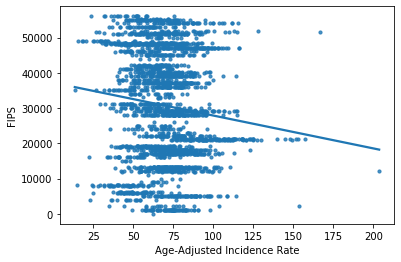

In [65]:
#for Problem 4 - part b
import seaborn as sns

sns.regplot(x=df2['Age-Adjusted Incidence Rate'], y=df2['FIPS'], scatter_kws={"s": 10}, ci=None)

Text(0, 0.5, 'FIPS')

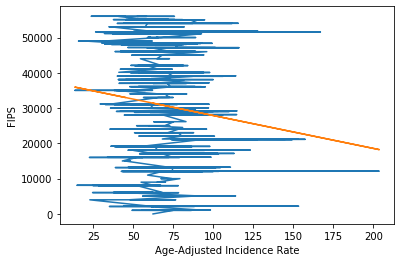

In [66]:
plt.plot(x, y)
plt.plot(x, y_pred)
plt.xlabel("Age-Adjusted Incidence Rate")
plt.ylabel("FIPS")

In [67]:
#For Problem 4 - part c
RSS = sum((y-y_pred)**2)
print(RSS)
print("Estimate for sigma^2 for the Incidence and FIPS rate Data set: ", RSS/(len(y)-2))

650381705348.7153
Estimate for sigma^2 for the Incidence and FIPS rate Data set:  246543481.93658656


In [68]:
#For Problem 4 - part d
SS_Total = sum((y-np.mean(y))**2) 
print("Total Sum of Squares= ", SS_Total)
r_squared = 1 - (float(RSS))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("R^2 for Incidence and FIPS data = ", r_squared)
print("Adjusted R^2 for Incidence and FIPS data = ", adjusted_r_squared)

Total Sum of Squares=  657778751683.9987
R^2 for Incidence and FIPS data =  0.011245492981258431
Adjusted R^2 for Incidence and FIPS data =  0.010870680810288524


In [69]:
#For Problem 4- part e (Hypothesis testing for the slope coefficient)
S_xx = sum((x - x.mean())**2)
test_stat1 = regr.coef_[0]*((len(y) - 2)*(S_xx)/RSS)**0.5
print("Value of the Test Statistic for testing slope coefficient: ", test_stat1[0])
interval = stats.t.interval(alpha = 0.95, df = len(y)-2)
if(test_stat1<interval[0] or test_stat1>interval[1]):
    print("The interval formed by the critical values at alpha = 0.05: ", (interval[0], interval[1]), "the Null Hypothesis is rejected")
else: 
    print("The Null Hypothesis is not rejected")

Value of the Test Statistic for testing slope coefficient:  -5.477500261337884
The interval formed by the critical values at alpha = 0.05:  (-1.9608636591179458, 1.9608636591179458) the Null Hypothesis is rejected


In [70]:
#For Problem 4 - part f (Hypothesis testing for the intercept)
squaresums = sum(x**2)
test_stat0 = regr.intercept_*((len(y)*len(y-2)*S_xx/(squaresums*RSS))**0.5)
print("Value of the Test Statistic for testing intercept coefficient: ", test_stat0[0])
interval = stats.t.interval(alpha = 0.95, df = len(y)-2)
if(test_stat1<interval[0] or test_stat1>interval[1]):
    print("The interval formed by the critical values at alpha = 0.05: ", (interval[0], interval[1]), "the Null Hypothesis is rejected")
else: 
    print("The Null Hypothesis is not rejected")

Value of the Test Statistic for testing intercept coefficient:  30.31072075396085
The interval formed by the critical values at alpha = 0.05:  (-1.9608636591179458, 1.9608636591179458) the Null Hypothesis is rejected


In [71]:
#ADDITIONAL TESTING: Problem 4
df = pd.merge(df1, df2, how="inner", on=["FIPS"])

In [72]:
df.drop(columns = "FIPS")

,Age-Adjusted Death Rate,Age-Adjusted Incidence Rate
0,46.0,62.4
1,59.3,74.9
2,48.0,66.9
3,61.3,74.6
4,67.8,86.4
...,...,...
2561,28.4,39.9
2562,29.1,23.7
2563,22.1,31.7
2564,38.2,50.0


In [73]:
x = df['Age-Adjusted Incidence Rate'].to_numpy().reshape(-1, 1)
y = df['Age-Adjusted Death Rate'].to_numpy()
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)

In [74]:
#ADDITIONAL: Problem 4 - part a
print("The point estimates found are as follows - Intercept:", regr.intercept_, "Slope Coefficient:", regr.coef_[0])

The point estimates found are as follows - Intercept: 4.788864452589394 Slope Coefficient: 0.6948087365901287


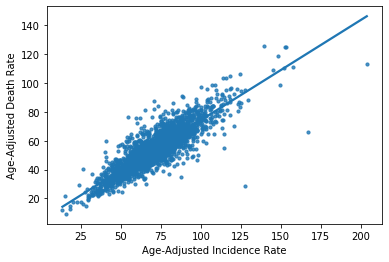

In [75]:
#ADDITIONAL: Problem 4 - part b
import seaborn as sns

sns.regplot(x=df['Age-Adjusted Incidence Rate'], y=df['Age-Adjusted Death Rate'], scatter_kws={"s": 10}, ci=None)

In [76]:
#ADDITIONAL: Problem 4 - part c
RSS = sum((y-y_pred)**2)
print(RSS)
print("Estimate for sigma^2 for the Incidence rate vs Death Rate Data set: ", RSS/(len(y)-2))

127450.6097402852
Estimate for sigma^2 for the Incidence rate vs Death Rate Data set:  49.70772610775554


In [80]:
#ADDITIONAL: Problem 4 - part d
SS_Total = sum((y-np.mean(y))**2) 
print("Total Sum of Squares= ", SS_Total)
r_squared = 1 - (float(RSS))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("R^2 for Incidence rate and Death Rate merged data = ", r_squared)
print("Adjusted R^2 for Incidence rate and Death Rate merged data = ", adjusted_r_squared)

Total Sum of Squares=  519767.2194855815
R^2 for Incidence rate and Death Rate merged data =  0.7547929054348131
Adjusted R^2 for Incidence rate and Death Rate merged data =  0.754697270842549


In [78]:
#ADDITIONAL Problem 4- part e (Hypothesis testing for the slope coefficient)
S_xx = sum((x - x.mean())**2)
test_stat1 = regr.coef_[0]*((len(y) - 2)*(S_xx)/RSS)**0.5
print("Value of the Test Statistic for testing slope coefficient: ", test_stat1[0])
interval = stats.t.interval(alpha = 0.95, df = len(y)-2)
if(test_stat1<interval[0] or test_stat1>interval[1]):
    print("The interval formed by the critical values at alpha = 0.05: ", (interval[0], interval[1]), "the Null Hypothesis is rejected")
else: 
    print("The Null Hypothesis is not rejected")

Value of the Test Statistic for testing slope coefficient:  88.83956009829706
The interval formed by the critical values at alpha = 0.05:  (-1.9608896368168331, 1.9608896368168331) the Null Hypothesis is rejected


In [79]:
#ADDITIONAL Problem 4 - part f (Hypothesis testing for the intercept)
squaresums = sum(x**2)
test_stat0 = regr.intercept_*((len(y)*len(y-2)*S_xx/(squaresums*RSS))**0.5)
print("Value of the Test Statistic for testing intercept coefficient: ", test_stat0[0])
interval = stats.t.interval(alpha = 0.95, df = len(y)-2)
if(test_stat1<interval[0] or test_stat1>interval[1]):
    print("The interval formed by the critical values at alpha = 0.05: ", (interval[0], interval[1]), "the Null Hypothesis is rejected")
else: 
    print("The Null Hypothesis is not rejected")

Value of the Test Statistic for testing intercept coefficient:  8.456922055409798
The interval formed by the critical values at alpha = 0.05:  (-1.9608896368168331, 1.9608896368168331) the Null Hypothesis is rejected
